In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import pandas as pd
import graphviz

In [44]:
pacientes_dataset = pd.read_csv('data/covid.csv')
x_ = pacientes_dataset[['fever', 'bodypain', 'age', 'runnynose', 'diffbreath']].values
y_ = pacientes_dataset['infected'].values
print(x_.shape)
print(y_.shape)
x_train, x_test, y_train, y_test = train_test_split(x_, y_, test_size=0.2, random_state=14)

(1999, 5)
(1999,)


In [45]:
decision_model = DecisionTreeClassifier(random_state=14,max_depth=4)
decision_model.fit(x_train, y_train)
y_pred = decision_model.predict(x_test)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Precision: {accuracy}")

Precision: 0.525


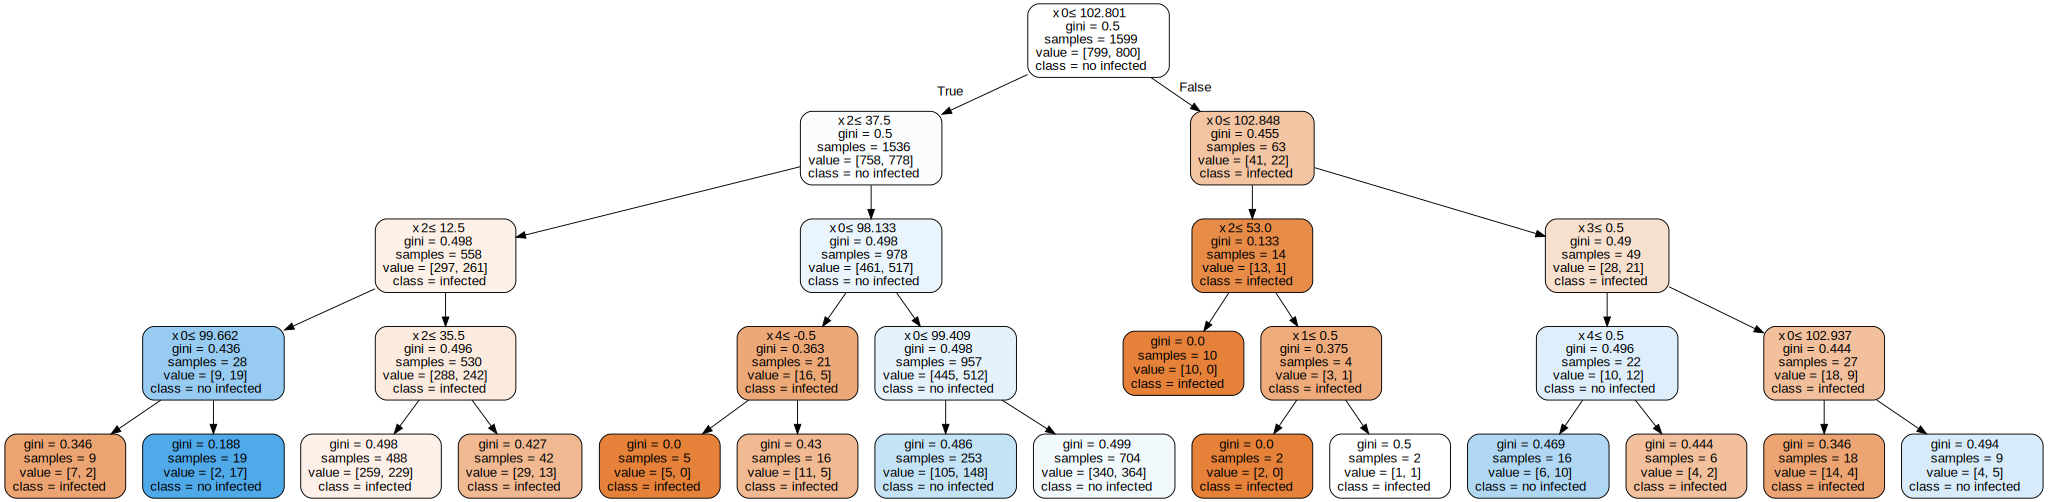

In [47]:
dot_data = export_graphviz(
    decision_model, out_file=None,
    class_names=['infected', 'no infected'],  
    filled=True, rounded=True, special_characters=True
)
graph = graphviz.Source(dot_data)  
graph